In [2]:
import pandas as pd
clean_questions = pd.read_csv("tokenized text data2.csv")
clean_questions.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,...,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,tokenized_pros,tokenized_summary,tokenized_cons,tokenized_advice
0,0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,...,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"['peopl', 'smart', 'friendli']","['best', 'compani', 'work']","['bureaucraci', 'slow', 'thing']",['none']
1,1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...",4.0,1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,...,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,[],"['move', 'speed', 'light', 'burn', 'inevit']","['work', 'life', 'balanc', 'balanc', 'perk', '...","['dont', 'dismiss', 'emot', 'intellig', 'adapt..."
2,2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,...,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,"['your', 'softwar', 'engin', 'your', 'among', ...","['great', 'balanc', 'bigcompani', 'secur', 'fu...","['becom', 'larger', 'come', 'grow', 'pain', 'b...","['keep', 'focu', 'user', 'everyth', 'els', 'fo..."
3,3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,...,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,"['cant', 'find', 'wellregard', 'compani', 'act...","['best', 'place', 'ive', 'work', 'also', 'dema...","['live', 'sf', 'commut', 'take', 'hour', 'hour...","['keep', 'micromanag', 'huge', 'benefit', 'us'..."
4,4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,...,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,"['world', 'everi', 'compani', 'lot', 'peopl', ...","['uniqu', 'one', 'kind', 'dream', 'job']","['dont', 'work', 'mtv', 'hq', 'given', 'work',...","['promot', 'manag', 'manag', 'manag', 'skill',..."


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_questions["pros"].tolist()
#based on company
#list_labels = clean_questions["company"].tolist()

list_labels = len(clean_questions["overall-ratings"].tolist())

for i in len(clean_questions["overall-ratings"].tolist()):
    if clean_questions["overall-ratings"].tolist()[i] > 3:
        list_labels[i] = 1
    else:
        list_labels[i] = 0

list_labels


X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

NameError: name 'clean_questions' is not defined

{'google': 0, 'apple': 1, 'facebook': 2, 'netflix': 3, 'amazon': 4, 'microsoft': 5}
True


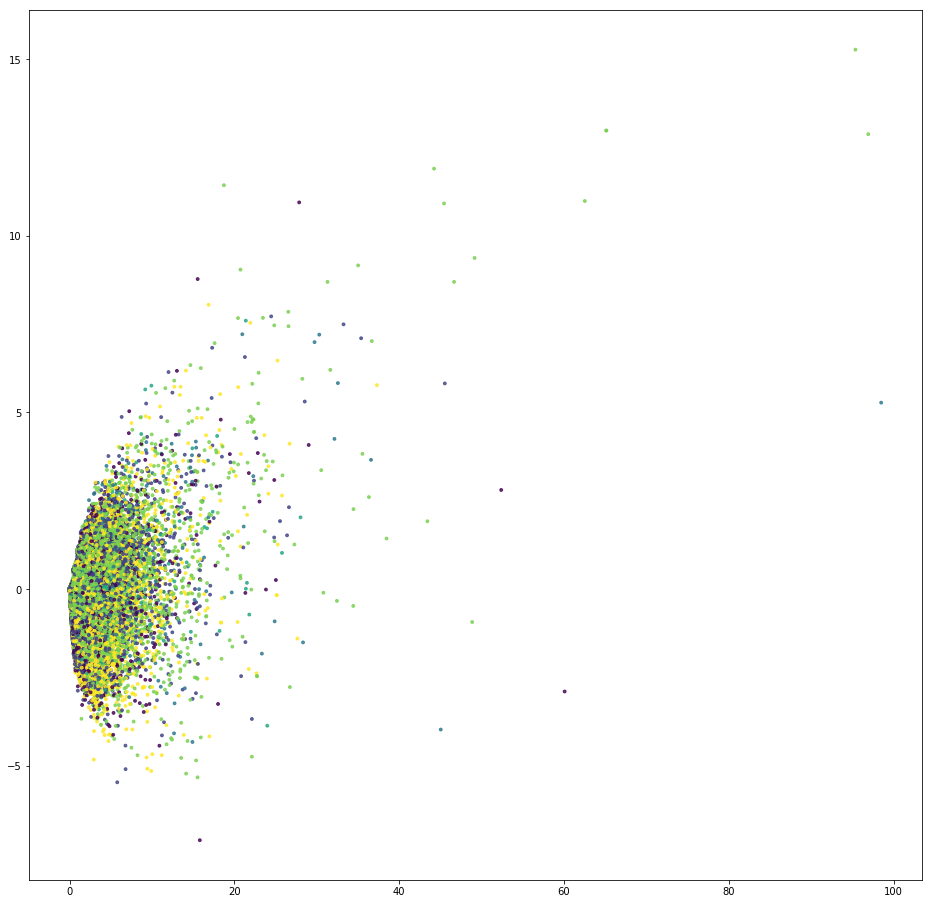

In [55]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        print(color_mapper)
        #print(test_labels)
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue', 'red', 'green', 'yellow', 'pink']
        if plot:
            print(plot)
            #, cmap=matplotlib.colors.ListedColormap(colors)
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=color_column)
            #red_patch = mpatches.Patch(color='orange', label='google')
            
            #green_patch = mpatches.Patch(color='blue', label='amazon')

            #blue_patch = mpatches.Patch(color='red', label='facebook')
            #white_patch = mpatches.Patch(color='green', label='apple')
            #black_patch = mpatches.Patch(color='yellow', label='microsoft')
            #purple_patch = mpatches.Patch(color='black', label='netflix')
            
            #plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [14]:
import numpy as np

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokenized_cons'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [15]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

NameError: name 'train_test_split' is not defined